In [1]:
# Import the required modules
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Part 1: Create a Pandas DataFrame

In [2]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_df = pd.read_csv("Resources/cc_info_default.csv")

# Review the first five rows of the DataFrame
ccinfo_df.head()

,limit_bal,education,marriage,age,bill_amt,pay_amt,default
0,20000,secondary,yes,24,7704,689,1
1,120000,secondary,no,26,17077,5000,1
2,90000,secondary,no,34,101653,11018,0
3,50000,secondary,yes,37,231334,8388,0
4,50000,secondary,yes,57,109339,59049,0


In [3]:
# Check for null values
ccinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  4999 non-null   int64 
 1   education  4999 non-null   object
 2   marriage   4999 non-null   object
 3   age        4999 non-null   int64 
 4   bill_amt   4999 non-null   int64 
 5   pay_amt    4999 non-null   int64 
 6   default    4999 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


## Part 2:  Preprocessing the Data
---
###  Transform "education" column with get_dummies

In [4]:
# Verify the categories of the "education" column
ccinfo_df["education"].value_counts()

secondary    2267
primary      1862
post-grad     822
other          48
Name: education, dtype: int64

In [5]:
# Transform the education column using get_dummies
education_dummies = pd.get_dummies(ccinfo_df["education"])

# Display the transformed data
education_dummies.tail()

,other,post-grad,primary,secondary
4994,0,0,0,1
4995,1,0,0,0
4996,0,0,0,1
4997,0,1,0,0
4998,0,0,1,0


In [6]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
ccinfo_df = pd.concat([ccinfo_df, education_dummies], axis=1)

# Drop the original education column
ccinfo_df = ccinfo_df.drop(columns=["education"])

# Display the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,yes,24,7704,689,1,0,0,0,1
1,120000,no,26,17077,5000,1,0,0,0,1
2,90000,no,34,101653,11018,0,0,0,0,1
3,50000,yes,37,231334,8388,0,0,0,0,1
4,50000,yes,57,109339,59049,0,0,0,0,1


### Transform "marriage" column with encoding function

In [7]:
# Encoding the marriage column using a custom function
def encode_marriage(marriage):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if marriage == "yes":
        return 1
    else:
        return 0

# Call the encode_marriage function on the marriage column
ccinfo_df["marriage"] = ccinfo_df["marriage"].apply(encode_marriage)

# Review the DataFrame 
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,1,24,7704,689,1,0,0,0,1
1,120000,0,26,17077,5000,1,0,0,0,1
2,90000,0,34,101653,11018,0,0,0,0,1
3,50000,1,37,231334,8388,0,0,0,0,1
4,50000,1,57,109339,59049,0,0,0,0,1


### Scale the Data
---
- Apply the Standard Scaler to "limit_bal", "bill_amt", "pay_amt"

In [8]:
# Scaling the numeric columns
ccinfo_data_scaled = StandardScaler().fit_transform(ccinfo_df[["limit_bal", "bill_amt", "pay_amt"]])

# Review the scaled data
ccinfo_data_scaled

array([[-1.1173411 , -0.66070266, -0.5427793 ],
       [-0.3499424 , -0.63637003, -0.46399421],
       [-0.58016201, -0.41680786, -0.35401308],
       ...,
       [ 0.26397655,  1.1152494 , -0.16349243],
       [ 1.10811512,  3.33813208,  0.76045505],
       [-0.04298292, -0.66917611, -0.4872953 ]])

In [9]:
# Create a DataFrame of the scaled data
ccinfo_data_scaled = pd.DataFrame(ccinfo_data_scaled, columns=["limit_bal", "bill_amt", "pay_amt"])

# Replace the original data with the columns of information from the scaled Data
ccinfo_df["limit_bal"] = ccinfo_data_scaled["limit_bal"]
ccinfo_df["bill_amt"] = ccinfo_data_scaled["bill_amt"]
ccinfo_df["pay_amt"] = ccinfo_data_scaled["pay_amt"]

# Review the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1


## Part 3. Use the Elbow Method to determine the optimal number of clusters for KMeans.

In [10]:
# Import the KMeans, Birch, and AgglomerativeClustering modules from SKLearn
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [11]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(ccinfo_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,449413.376075
1,2,152036.470987
2,3,84174.926727
3,4,59700.326193
4,5,45604.614110
5,6,37772.489296
6,7,33901.773156
7,8,31768.916811
8,9,27901.206965
9,10,26688.498979


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

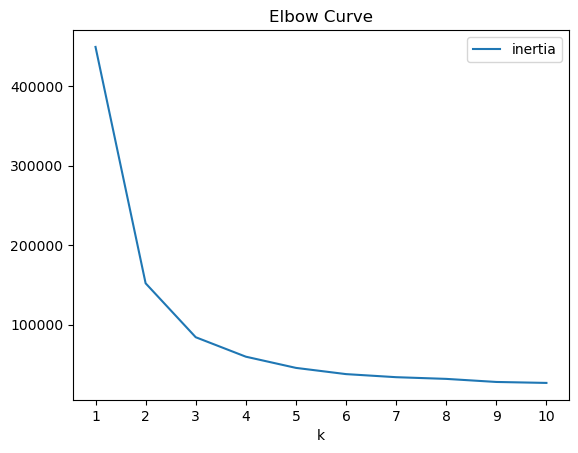

In [12]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

## Part 4: Segment the data with K-means using the optimal number of clusters

In [13]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=3)

# Fit the model
model.fit(ccinfo_df)

# Make predictions
kmeans_predictions = model.predict(ccinfo_df)

## Part 5. Cluster the data using AgglomerativeClustering and Birch

Using your optimal number of clusters found above, additionally estimate clusters by using both `AgglomerativeClustering` and `Birch`. Save each of these models and their results for comparison.

In [14]:
# Fit a AgglomerativeClustering Model with three clusters
agglo_model = AgglomerativeClustering(n_clusters=3)

# Make predictions with the AgglomerativeClustering model
agglo_predictions = agglo_model.fit_predict(ccinfo_df)

# Previewing the predicted customer classifications for AgglomerativeClustering
agglo_predictions[-10:]

array([0, 1, 2, 1, 2, 2, 0, 1, 1, 2])

In [15]:
# Fit a Birch Model with three clusters.
birch_model = Birch(n_clusters=3)
birch_model.fit(ccinfo_df)

# Make predictions with the Birch model
birch_predictions = birch_model.predict(ccinfo_df)

# Previewing the predicted customer classifications for BIRCH
birch_predictions[-10:]

array([1, 0, 1, 0, 2, 1, 1, 2, 2, 2])

## Part 6. Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch

In [16]:
# Create a copy of the preprocessed data
ccinfo_predictions_df = ccinfo_df.copy()
# Add class columns with the labels to the new DataFrame
ccinfo_predictions_df["kmeans-segments"] = kmeans_predictions
ccinfo_predictions_df["agglomerative-segments"] = agglo_predictions
ccinfo_predictions_df["birch-segments"] = birch_predictions
ccinfo_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
0,1,0,1
1,1,0,1
2,2,0,1


<Axes: xlabel='limit_bal', ylabel='age'>

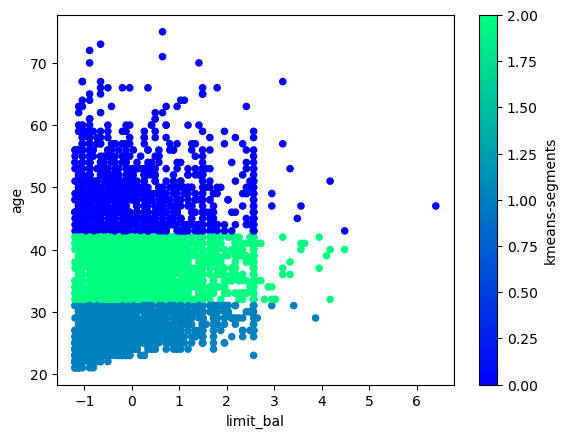

In [17]:
# Plot the kmeans clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="kmeans-segments",
    colormap="winter")

<Axes: xlabel='limit_bal', ylabel='age'>

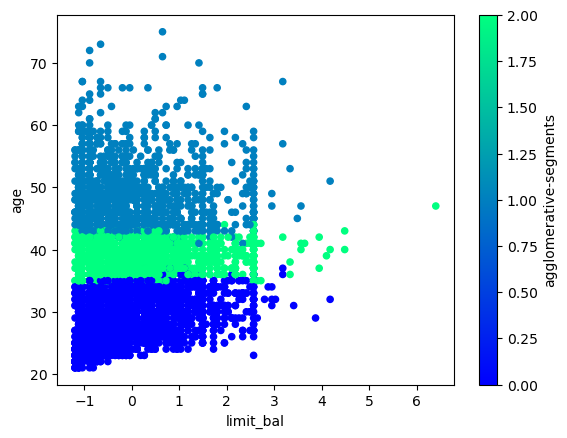

In [18]:
# Plot the agglomerative clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="agglomerative-segments",
    colormap="winter")

<Axes: xlabel='limit_bal', ylabel='age'>

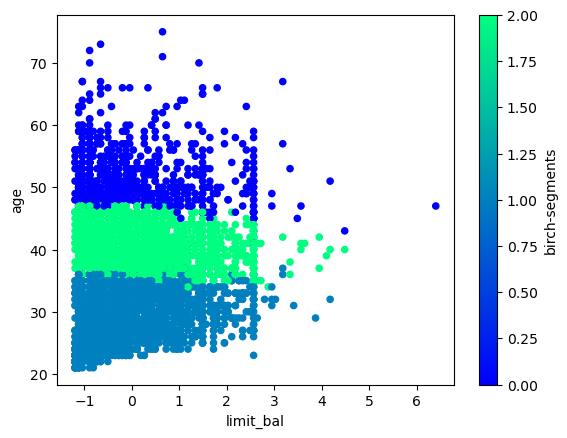

In [19]:
# Plot the birch clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="birch-segments",
    colormap="winter")

In [20]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_birch = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

In [21]:
from sklearn import metrics
# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto',random_state=0)
    k_model.fit(ccinfo_df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(ccinfo_df, labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_predictions = agglo_model.fit_predict(ccinfo_df)
    labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(ccinfo_df, labels)    
    score_agglomerative.append(score)    
    
    # Birch variance and score
    birch_model = Birch(n_clusters=i)
    birch_model.fit(ccinfo_df)
    labels = birch_model.labels_
    score = metrics.calinski_harabasz_score(ccinfo_df, labels)    
    score_birch.append(score)

In [22]:
# Display the scores. 
display(score_kmeans)
display(score_agglomerative)
display(score_birch)

[9773.920593395434,
 10838.924154077189,
 10868.82215618195,
 11054.917340026781,
 10882.644940926417,
 10197.273518345357,
 9373.328691998586,
 9423.184302063666,
 8780.20492596397]

[9076.808612155677,
 9255.71537539299,
 9219.720912306117,
 10226.211061446673,
 9558.227623539258,
 9127.778035821166,
 8747.754787043401,
 8240.491676699889,
 7829.211868585651]

[9248.935893794674,
 9423.864817862352,
 7247.089808462924,
 9253.117720074853,
 9439.690013799827,
 9053.438258977212,
 8248.401120590908,
 7668.801584420389,
 7145.590750408358]